In [16]:
import os
import csv
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Definir os diretórios para imagens com leucemia e imagens normais
diretorio_leucemia = '/content/drive/MyDrive/lla leucemia/LLA'
diretorio_normal = '/content/drive/MyDrive/lla leucemia/Normal'

# Definir o nome do arquivo CSV de saída
arquivo_saida = 'rotulos.csv'

# Abrir o arquivo CSV para escrita
with open(arquivo_saida, 'w', newline='') as file:
    writer = csv.writer(file)

    # Escrever o cabeçalho
    writer.writerow(['nome_imagem', 'rotulo'])

    # Iterar através das imagens com leucemia e escrever no CSV
    for nome_imagem in os.listdir(diretorio_leucemia):
        caminho_completo = os.path.join(diretorio_leucemia, nome_imagem)
        if os.path.isfile(caminho_completo):
            writer.writerow([caminho_completo, 'lla'])

    # Iterar através das imagens normais e escrever no CSV
    for nome_imagem in os.listdir(diretorio_normal):
        caminho_completo = os.path.join(diretorio_normal, nome_imagem)
        if os.path.isfile(caminho_completo):
            writer.writerow([caminho_completo, 'normal'])

In [18]:
# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data_info = pd.read_csv(csv_file, encoding='ISO-8859-1')
        self.transform = transform

    def __len__(self):
        return len(self.data_info)

    def __getitem__(self, index):
        single_image_name = self.data_info.iloc[index, 0]
        single_image_label = self.data_info.iloc[index, 1]
        image = Image.open(single_image_name).convert('RGB')
        label = 1 if single_image_label == 'lla' else 0
        if self.transform:
            image = self.transform(image)
        return image, label


# Paths and csv file
csv_file = '/content/rotulos.csv'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [19]:
# Load dataset
dataset = CustomDataset(csv_file=csv_file, transform=transform)

# K-fold Cross Validation
num_epochs = 30
num_folds = 3
kfold = KFold(n_splits=num_folds, shuffle=True)


FOLD 1
--------------------------------
Number of steps per epoch: 7


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#################### Train ####################
Epoch 1, Loss: 1.9519, Acc: 65.74, Time: 92.42
#################### Train ####################
Epoch 2, Loss: 0.4583, Acc: 77.78, Time: 90.16
#################### Train ####################
Epoch 3, Loss: 0.1991, Acc: 94.44, Time: 91.16
#################### Train ####################
Epoch 4, Loss: 0.1281, Acc: 95.37, Time: 91.66
#################### Train ####################
Epoch 5, Loss: 0.0570, Acc: 98.61, Time: 92.20
#################### Train ####################
Epoch 6, Loss: 0.0476, Acc: 97.69, Time: 92.46
#################### Train ####################
Epoch 7, Loss: 0.0416, Acc: 99.07, Time: 92.18
#################### Train ####################
Epoch 8, Loss: 0.0635, Acc: 98.61, Time: 91.87
#################### Train ####################
Epoch 9, Loss: 0.0684, Acc: 98.15, Time: 91.40
#################### Train ####################
Epoch 10, Loss: 0.0588, Acc: 98.15, Time: 92.78
#################### Train ####################
E

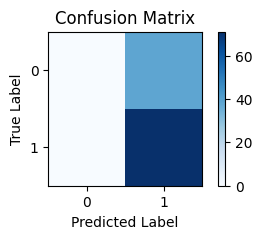

FOLD 2
--------------------------------
Number of steps per epoch: 7


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#################### Train ####################
Epoch 1, Loss: 1.3931, Acc: 74.19, Time: 91.99
#################### Train ####################
Epoch 2, Loss: 0.1307, Acc: 94.93, Time: 92.89
#################### Train ####################
Epoch 3, Loss: 0.2317, Acc: 93.55, Time: 92.93
#################### Train ####################
Epoch 4, Loss: 0.0339, Acc: 99.54, Time: 92.99
#################### Train ####################
Epoch 5, Loss: 0.0202, Acc: 99.08, Time: 93.70
#################### Train ####################
Epoch 6, Loss: 0.0504, Acc: 98.16, Time: 93.12
#################### Train ####################
Epoch 7, Loss: 0.0186, Acc: 99.54, Time: 92.94
#################### Train ####################
Epoch 8, Loss: 0.2803, Acc: 93.55, Time: 93.26
#################### Train ####################
Epoch 9, Loss: 0.0490, Acc: 98.16, Time: 92.91
#################### Train ####################
Epoch 10, Loss: 0.0148, Acc: 100.00, Time: 94.05
#################### Train ####################


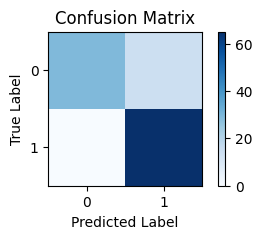

FOLD 3
--------------------------------
Number of steps per epoch: 7


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#################### Train ####################
Epoch 1, Loss: 1.4226, Acc: 72.81, Time: 94.31
#################### Train ####################
Epoch 2, Loss: 0.0307, Acc: 99.08, Time: 93.98
#################### Train ####################
Epoch 3, Loss: 0.1809, Acc: 97.24, Time: 93.56
#################### Train ####################
Epoch 4, Loss: 0.4438, Acc: 94.47, Time: 95.37
#################### Train ####################
Epoch 5, Loss: 0.3810, Acc: 92.17, Time: 92.87
#################### Train ####################
Epoch 6, Loss: 0.1717, Acc: 93.55, Time: 92.69
#################### Train ####################
Epoch 7, Loss: 0.0445, Acc: 99.54, Time: 93.50
#################### Train ####################
Epoch 8, Loss: 0.0292, Acc: 99.08, Time: 93.58
#################### Train ####################
Epoch 9, Loss: 0.1033, Acc: 98.16, Time: 92.63
#################### Train ####################
Epoch 10, Loss: 0.0479, Acc: 98.16, Time: 92.98
#################### Train ####################
E

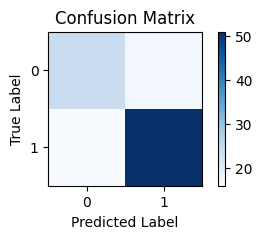

Length of avg_train_losses: 30
Length of avg_val_losses: 1


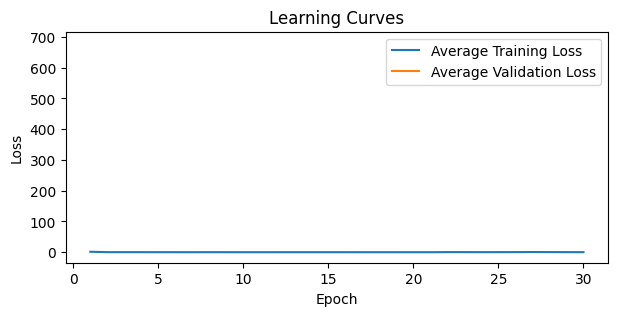

FINAL RESULTS:
Average F1-Score: 0.6408950617283952
Average Recall: 0.6701630813600742
Average Accuracy: 0.7387303205346019


In [21]:
# Store metrics for each fold
f1_scores = []
recalls = []
accuracies = []
train_losses = []
val_losses = []
all_train_losses = []
all_val_losses = []

# Main loop for k-fold cross validation
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    print(f"FOLD {fold + 1}")
    print("--------------------------------")

    # Define train and test data loaders
    train_subsampler = Subset(dataset, train_ids)
    test_subsampler = Subset(dataset, test_ids)
    train_loader = DataLoader(train_subsampler, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_subsampler, batch_size=32, shuffle=False)

    # Get the number of steps per epoch
    num_steps_per_epoch = len(train_loader)
    print(f"Number of steps per epoch: {num_steps_per_epoch}")

    # Load VGG-19 model
    vgg19 = torchvision.models.vgg19_bn(pretrained=True)
    num_features = vgg19.classifier[6].in_features
    vgg19.classifier[6] = nn.Linear(num_features, 2)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(vgg19.parameters(), lr=0.001, weight_decay=0.008)

    # Move model to device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    vgg19 = vgg19.to(device)

    # Training
    train_losses = [] # Reset the train_losses for this fold
    for epoch in range(num_epochs):
        vgg19.train()
        start = time.time()
        epoch_loss = []
        pred_list, label_list = [], []
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = vgg19(inputs)
            loss = criterion(outputs, labels)
            epoch_loss.append(loss.item())
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            pred_list += preds.tolist()
            label_list += labels.tolist()

        epoch_loss = np.mean(epoch_loss)
        train_losses.append(epoch_loss)
        pred_list = np.array(pred_list)
        label_list = np.array(label_list)

        acc = accuracy_score(label_list, pred_list)
        end = time.time()
        print('#################### Train ####################')
        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Acc: {acc * 100:.2f}, Time: {end - start:.2f}')

    all_train_losses.append(train_losses)  # Adding list of train losses for this fold

    # Evaluation
    val_losses = [] # Reset the val_losses for this fold
    vgg19.eval()
    start = time.time()
    epoch_loss = []
    all_preds, all_labels = [], []
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = vgg19(inputs)
            loss = criterion(outputs, labels)
            epoch_loss.append(loss.item())
            _, preds = torch.max(outputs, 1)
            all_preds += preds.tolist()
            all_labels += labels.tolist()

    epoch_loss = np.mean(epoch_loss)
    val_losses.append(epoch_loss)  # Adding loss for this epoch in validation
    all_val_losses.append(val_losses)  # Adding list of val losses for this fold
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Metrics
    f1 = f1_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    acc = accuracy_score(all_labels, all_preds)
    end = time.time()

    print(f"FOLD {fold + 1} RESULTS:")
    print(f"F1-Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {acc}")

    f1_scores.append(f1)
    recalls.append(recall)
    accuracies.append(acc)

    #print('********** Validate **********')
    #print(f'Epoch {epoch + 1}, Loss: {epoch_loss:.4f}, Acc: {acc * 100:.2f}, Time: {end - start:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(4, 2))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Convert list to arrays for easy calculations
all_train_losses = np.array(all_train_losses)
all_val_losses = np.array([item for sublist in all_val_losses for item in sublist]) # Flatten the val_losses

# Calculate the average over the folds
avg_train_losses = np.mean(all_train_losses, axis=0)
avg_val_losses = np.mean(all_val_losses, axis=0)

# Convert avg_val_losses to a list
avg_val_losses = [avg_val_losses]

# Check the lengths
print(f"Length of avg_train_losses: {len(avg_train_losses)}")
print(f"Length of avg_val_losses: {len(avg_val_losses)}")


# Plot learning curves
plt.figure(figsize=(7, 3))
plt.plot(range(1, len(avg_train_losses) + 1), avg_train_losses, label='Average Training Loss')
plt.plot(range(1, len(avg_val_losses) + 1), avg_val_losses, label='Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Overall results
print(f"FINAL RESULTS:")
print(f"Average F1-Score: {np.mean(f1_scores)}")
print(f"Average Recall: {np.mean(recalls)}")
print(f"Average Accuracy: {np.mean(accuracies)}")



In [ ]:
num_classes = 2
confusion_matrix_general = np.zeros((num_classes, num_classes), dtype=int)